## Cleaning Data in Pyhon

### Common Data Problems

- Garbage In Garbage Out

#### Data type contsraints
- Our variables must have the correct data types

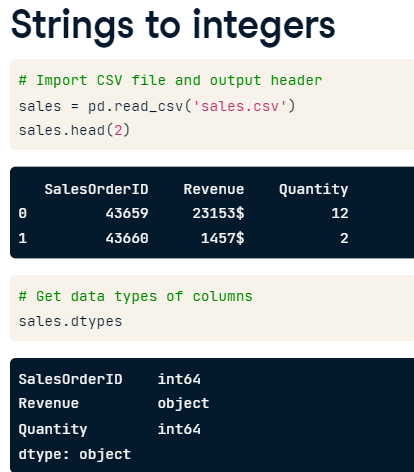

In [ ]:
# Converting Strings to Integers
sales = pd.read_csv('sales.csv')
# Get the data types of the columns
sales.dtypes
# Conversion to int after removing the $ sign at the end in Revenue 
sales['Revenue'] = sales['Revenue'].str.strip('$')
sales['Revenue'] = sales['Revenue'].astype('int')
# Verifying that 'Revenue' is an integer
# The assert statement returns nothing if the condition is met and an error if the condition is not met
assert sales['Revenue'].dtype == 'int'


### Data Range Constraints

- There is an error in data collection as the average rating of movies should be between 1-5 while some movies have a rating of 6

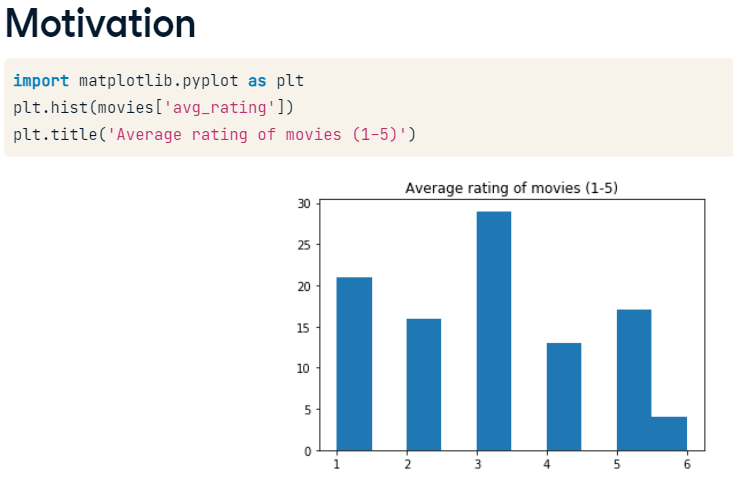

### How to deal with out of range data?

- Drop data if a very small percentage of the data from the dataset is out of range
- Set Custom minimum or maximum ranges on columns
- Date Range example
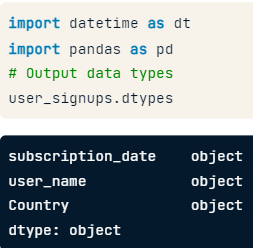

In [ ]:
# Droping out of range data using filtering
movies = movies[movies['avg_rating'] <= 5]

# Droping out of range data using .drop()
movies.drop(movies[movies['avg_rating']>5].index, inplace = True)

# Setting a hard limit
movies.loc[movies['avg_rating'] > 5, 'avg_rating'] = 5

# DATE RANGE EXAMPLE
import datetime as dt
import pandas as pd
# Converting object dtype to date dtype
user_signups['subscription_date'] = pd.to_datetime(user_signups['subscription_date']).dt.date
today_date = dt.date.today()

### Uniqueness constraint
- Duplicate values
- Often arrise due to joining datasets

#### How to find duplicate values?
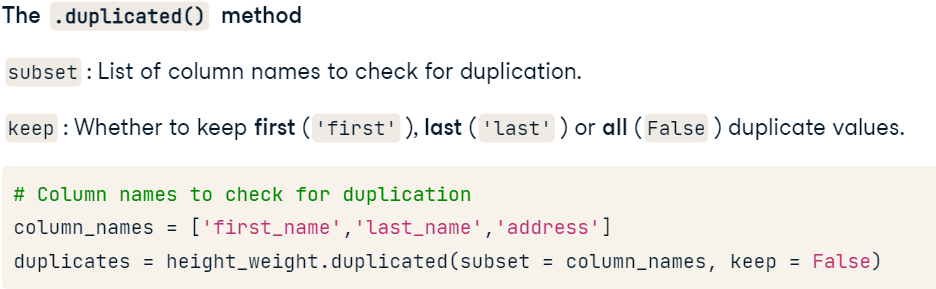

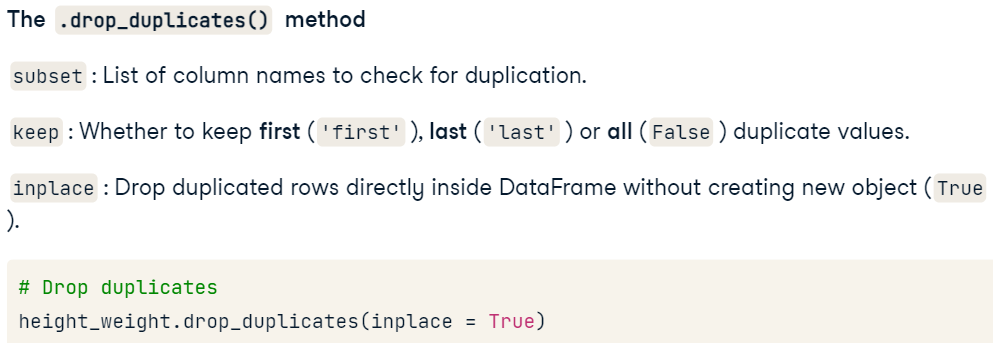


In [ ]:
# HOW TO FIND DUPLICATE VALUES?
# .duplicated() function returns True for duplicate values and False for non duplicate values
duplicates = height_weight.duplicated()
print(duplicates)

### Membership Constraints

- Inconsistencies can arise due to data entry errors or parsing errors.

### How to treat these problems?

1) Dropping Data:

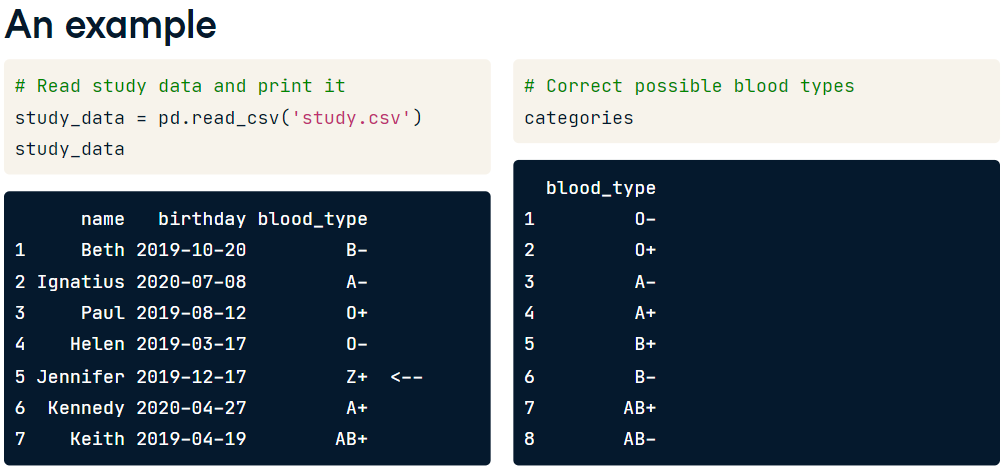
- There is no blood type as Z+
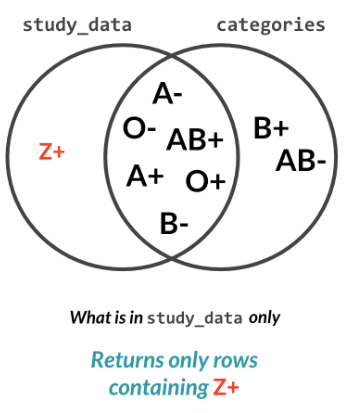
- A Left Anti Join returns all the inconsistent entries 
- An Inner join returns all the consistent entries

2) Remapping Categories
3) Inferring Categories

In [ ]:
#  Membership Constraints

# 1) Dropping Data:
# Performing an anti join
inconsistent_categories = set(study_data[blook_type].difference(categories['blood_type']))
# Get and print rows with inconsistent categories
inconsistent_rows = study_data['blood_type'].isin(inconsistent_categories)
inconsistent_data = study_data['inconsistent_rows']
# Droping inconsistent categories to get consistent rows only
consistent_data = study_data[~inconsistent_rows]


### Categorical Variables

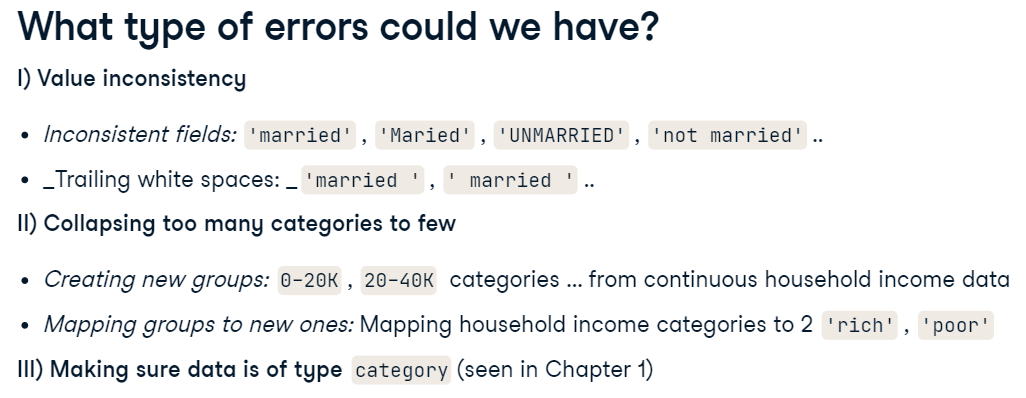

1) Value Consistency

- Capitalization can be a problem. eg:
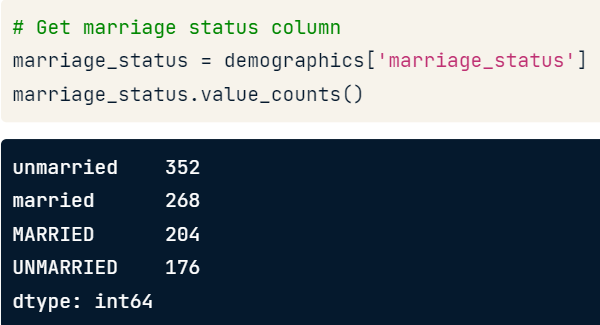
Solution: Capitalize, or Lowercase all the values

- Leading or Trailing Spaces
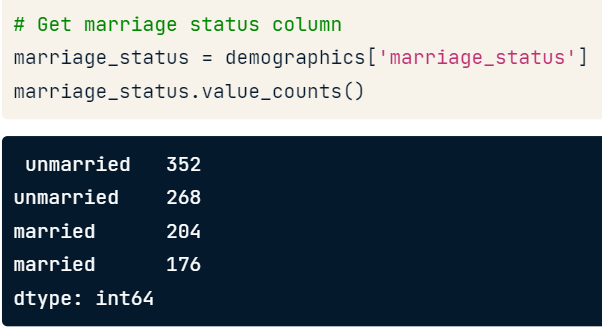
Solution: use the str.strip() method

- Collapsing data into categories
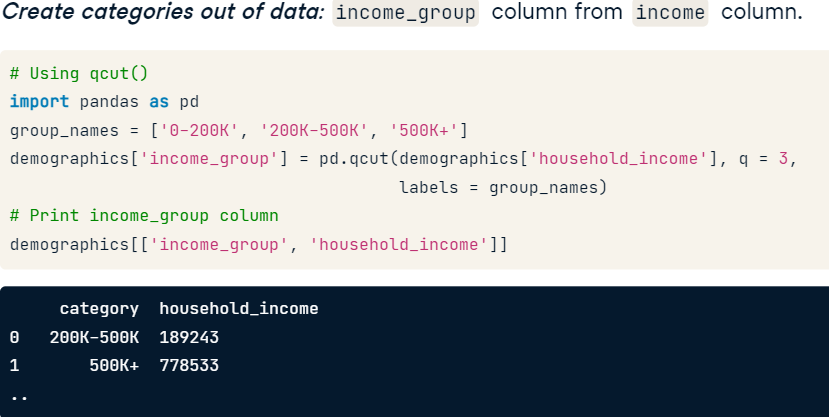

- Mapping categories into fewer ones
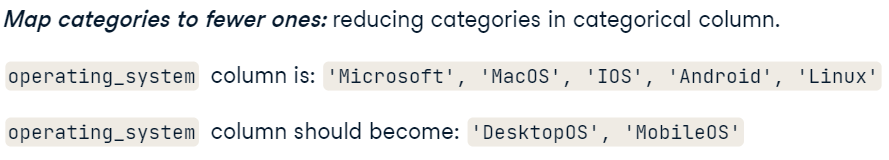

In [ ]:
# 1) Value Consistency:

# Capitalization
marraige_status['marraige_status'] = marraige_status['marraige_status'].str.upper()
# Checking the results
marraige_status['marraige_status'].value_counts()

# Leading or Trailing Spaces
demographics = demographics['marraige_status'].str.strip()
# Checking the results
demographics['marriage_status'].value_counts()

# Collapsing data into categories using qcut()
group_names = ['0-200K', '200K-500K', '500K+']
demographics['income_group'] = pd.qcut(demographics['household_income'], q = 3, labels = group_names)
# Print income_group column
demographics[['income_group', 'household_income']]

# Collapsing data into categories using cut()
ranges = [0, 200000, 500000, np.inf]
group_names = ['0-200K', '200K-500K', '500K+']
# Create income_group column
demographics['income_group'] = pd.cut(demographics['household_income'], bins = ranges, labels = group_names)
# Print income_group column
demographics[['income_group', 'household_income']]

# Mapping categories into fewer ones
mapping = {'Microsoft': 'DesktopOS', 'MacOS': "DesktopOS", "Linux":'DesktopOS', 'IOS':"MobileOS", "Android":"MobileOS"}
devices['operating_system'] = devices['opertaing_system'].replace(mapping)
devices['operating_system'].unique()



### Text Data

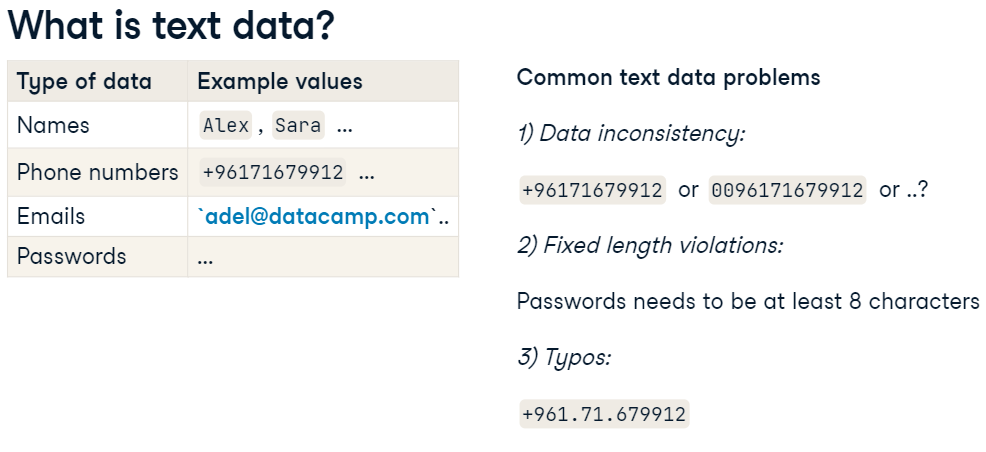

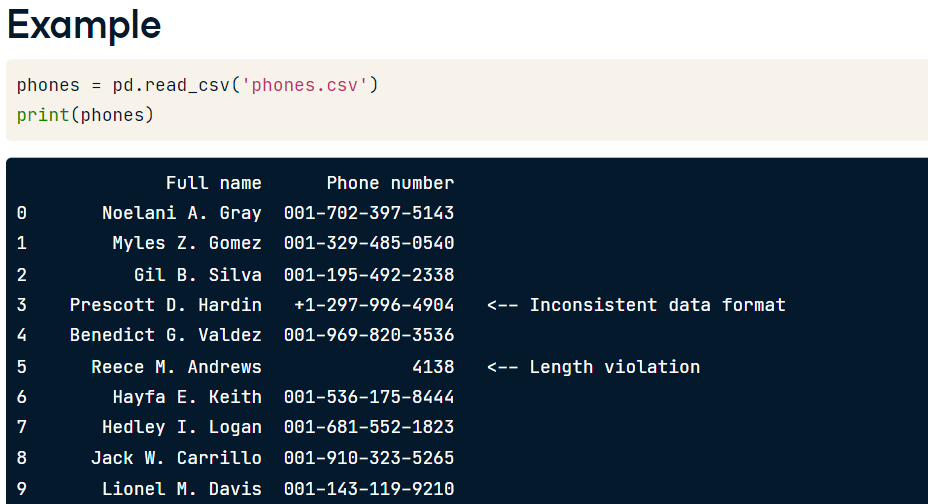

COMPLICATED EXAMPLE
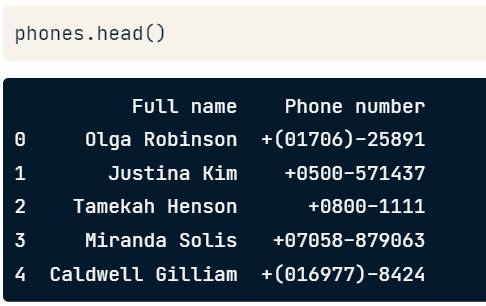



In [ ]:
# FIXING PHONE NUMBER COLUMN

# Replacing "+" with "00"
phones["Phone number"] = phones["Phone number"].str.replace("+", "00")

# Replacing phone numbers with less than 10 digits to NaN
digits = phones['Phone number'].str.len()
phones.loc[digits < 10, "Phone number"] = np.nan
phones

# Assert statements to check the channges that we made
# Find length of each row in phone number column
sanity_check = phone['Phone number'].str.len()
# Assert minimum phone number length is 10
assert sanity_check.min() >= 10
# Assert all numbers do not have '+' or '-'
assert phones['Phone number'].str.contains("+|-").any == False

# COMPLICATED EXAMPLE
# Regular Expressions in action
phones['Phone number'] = phones['Phone number'].str.replace(r'\D+', '') # '\D+' meand anything that is not a digit
phones.head()

### Uniformity

- The units need to be uniform to have an accurate analysis

- Temperature Example
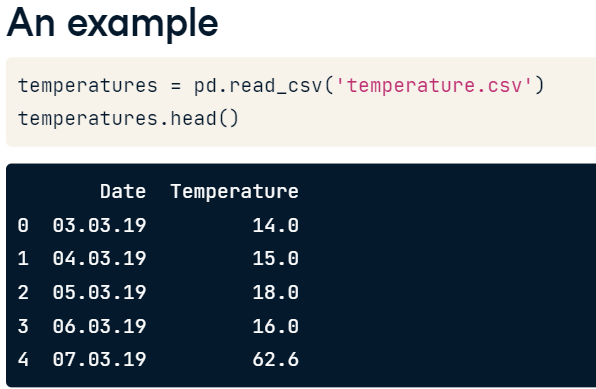

- Date Example
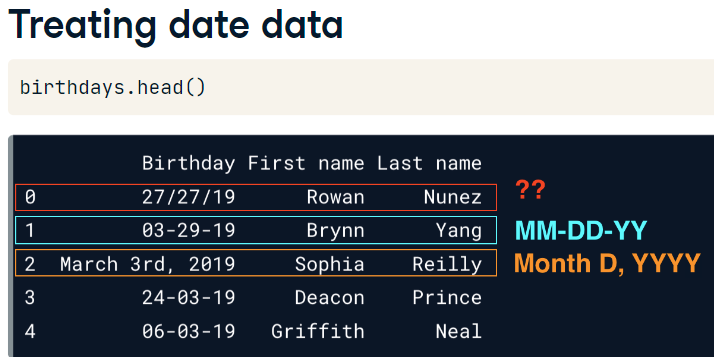
- Converting date objects to datetime object is most likely not enough as there might be values in the column that are not identifiable by the pandas '.to_datetime()' method

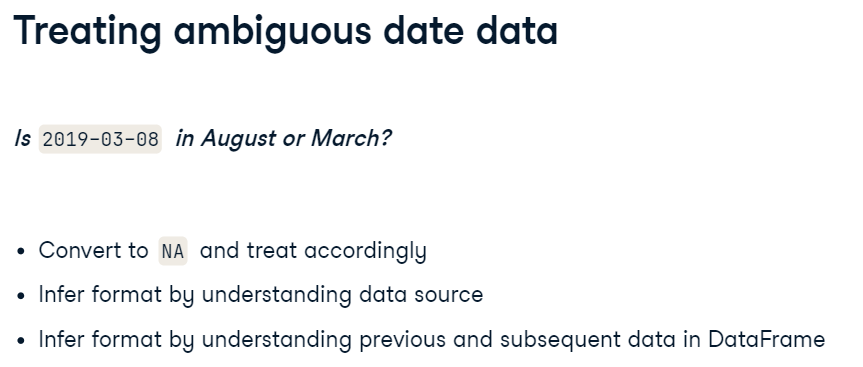

In [ ]:
# Temperature Example
# Plotting a scatter plot of our data to visualize anomalies
import matplotlib.pyplot as plt
plt.scatter(x = 'Date', y = 'Temperature', data = temperatures)
plt.title('Temperature in Celcius March 2019 - NYC')
plt.xlabel('Dates')
plt.ylabel('Temperature in Celcius')
plt.show()

# Isolating temperature values greater than 40 which is a common sense maximum for temperatures in NYC
temp_fah = temperatures.loc(temperatures['Temperature'] > 40, 'Temperature')
# Converting fahrenheit into celcius
temp_cells = (temp_fah - 32) * (5/9)
# replacing fahrenheit with celcius temperatures
temperatures.loc[temperatures['Temperature'] > 40, 'Temperature'] = temp_cells
# Making sure of the conversion using assert statements
assert temperatures['Temperature'].max() < 40


In [ ]:
# Date Example
# Converting Date column to datetime - but wont work!
birthdays['Birthday'] = pd.to_datetime(birthdays['Birthday'])
# This method will work
# errors = 'coerce' will return NA for the rows where the conversion to datetime object failed
birthdays['Birthday'] = pd.to_datetime(birthdays['Birthday'], infer_datetime_format = True, errors = 'coerce')

# Changing the format of the datetime object
birthdays['Birthday'] = birthdays['Birthday'].dt.strftime("%d-%m-%Y")


### Cross Field Validation

- Cross field validation is the use of multiple fields in a dataset to sanity check data integrity
- First Example
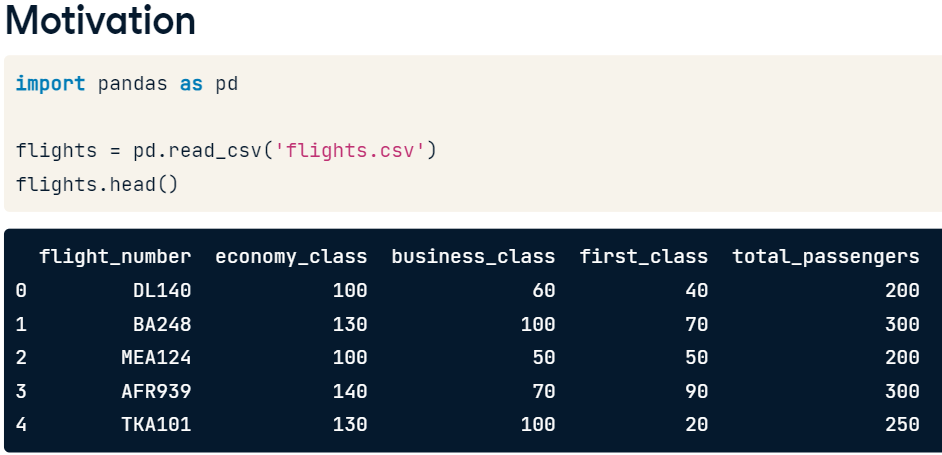
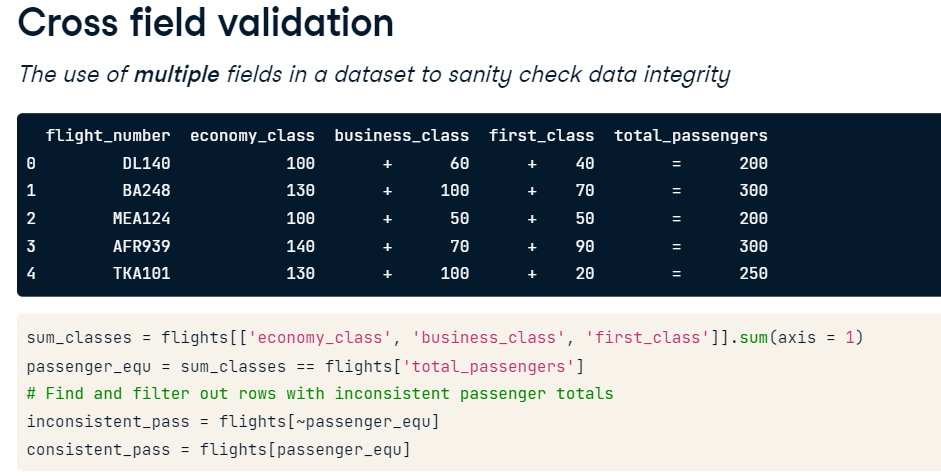
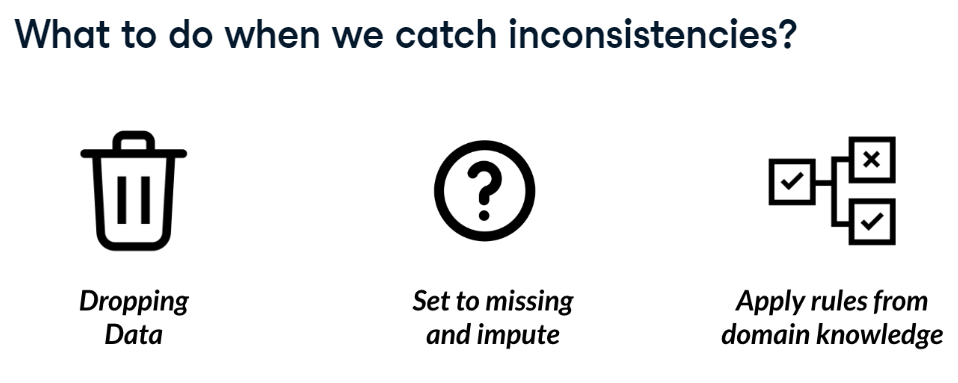

In [ ]:
# Cross Field Validating Birthdays

import pandas as pd
import datetime as dt

# Converting to datetime to get todays date
users['Birthday'] = pd.to_datetime(users['Birthday'])
today = dt.date.today()
# Calculating the age
age_manual = today.year - users['Birthday'].dt.year
# Finding instances where ages match
age_equ = age_manual == users['Age']
# Filtering out rows with inconsistent age
inconsistent_age = users[~age_equ]
consistent_age = users[age_equ]

### Completeness

#### Visualizing missing data

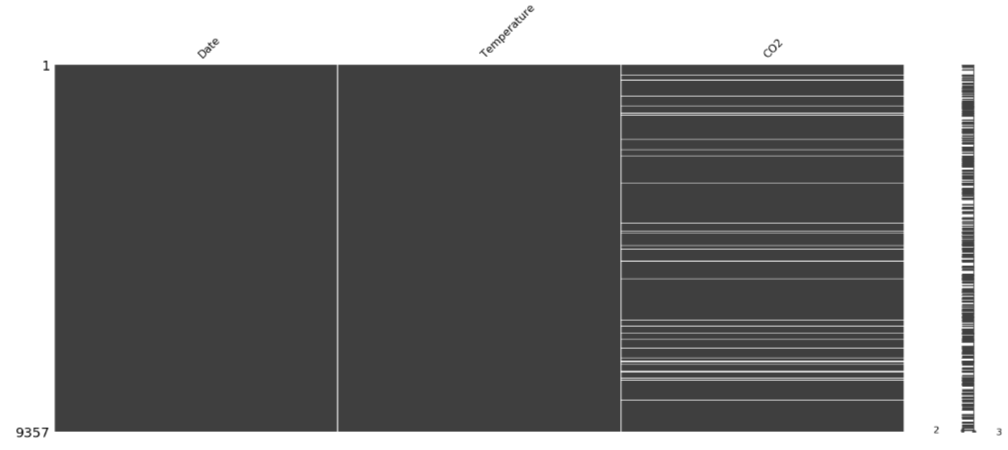
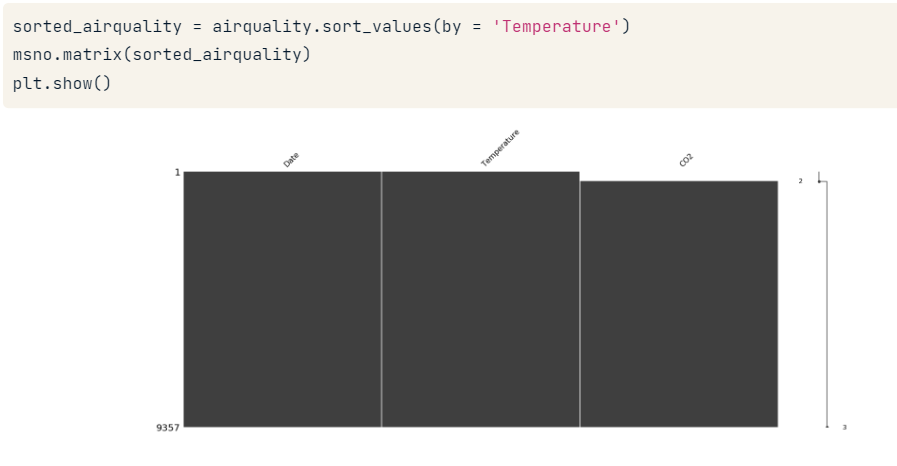

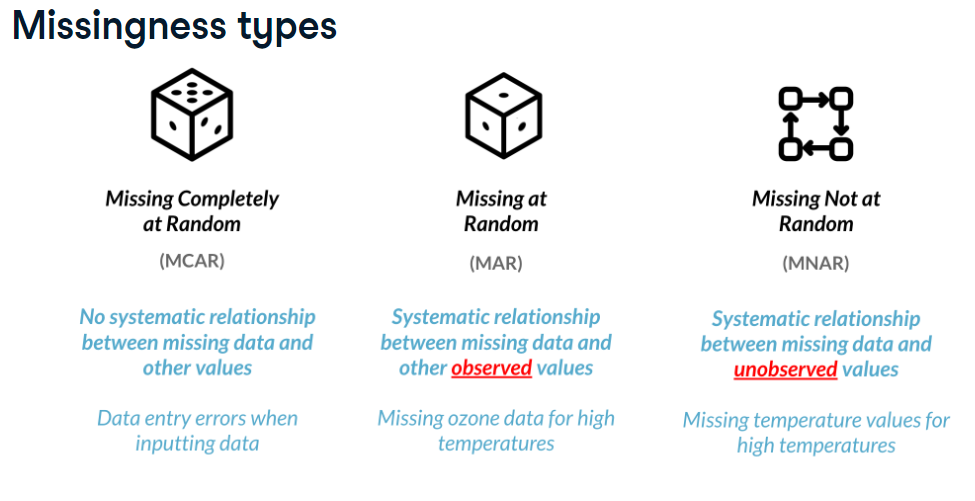

### How to deal with missing data?

1) Drop missing data
2) Impute them with statistical measures like mean, median and mode
3) Impute them with an algorithmic approach
4) Impute with machine learning models

In [ ]:
# Visualizing missing data
import missingno as msno
import matplotlib.pyplot as plt
# visualize missingness
masno.matrix(airquality)
plt.show()

# Isolating the missing values
complete = airquality[airquality['CO2'].isna()]
missing = airquality[~airquality['CO2'].isna()]
# Describe complete and missing dataframes
complete.describe()
missing.describe()
# Visualizing the analysis that the missing values are mostly negative
sorted_quality = airquality.sort_values(by = 'Temperature')
msno.matrix(sorted_quality)
plt.show()

In [ ]:
# Dealing with missing data

# 1) Dropping missing values
airquality_dropped = airquality.dropna(subset = ['CO2'])
airquality_dropped.head()

# 2) Replacing with statistical measures
co2_mean = airquality['CO2'].mean()
airquality_imputed = airquality.fillna({'CO2': co2_mean})
airquality_imputed.head()

### Comparing Strings

#### Minimum Edit Distance
- Least possible amount of steps needed to transition from one string to another
eg: from intention to execution
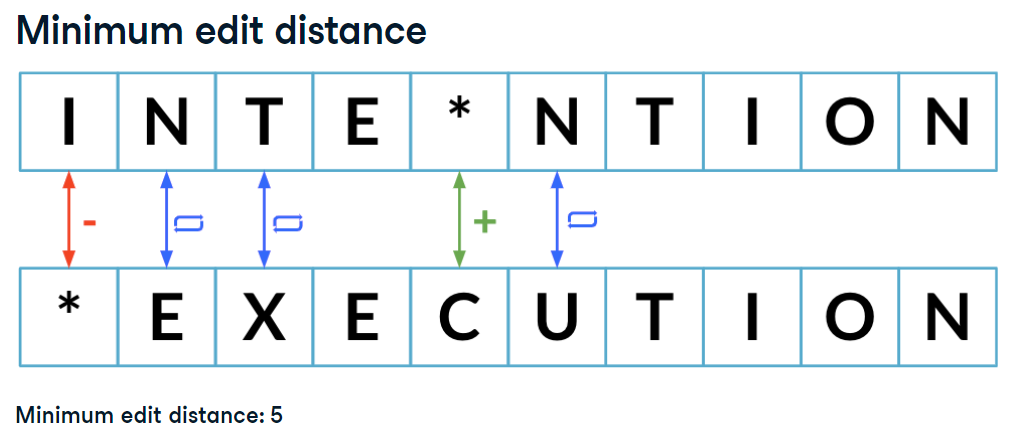
- The lower the edit distance, the closer the two words are
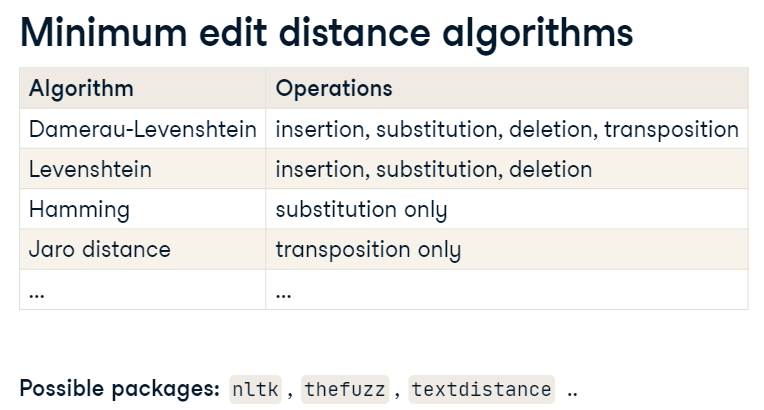
- When using the WRatio function from 'thefuzz' package, the output is a number from 0 to 100 with 0 meaning not matching at all and 100 meaning a perfect match
- It is highly robust against partial string comparission
and different orderings
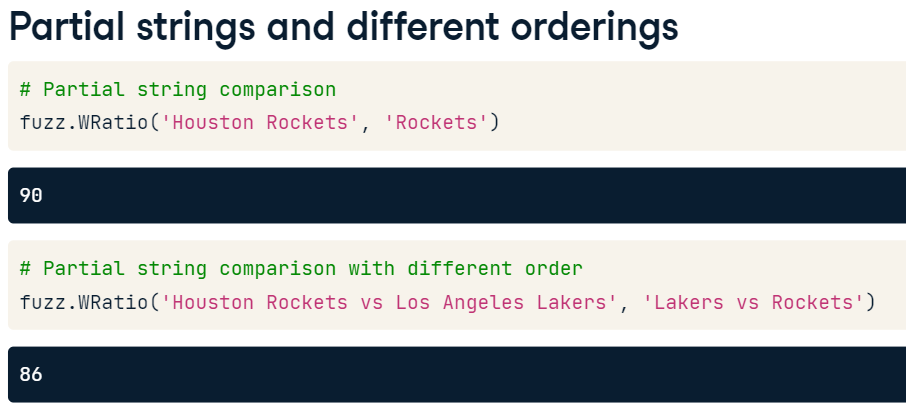

#### Comparission with Arrays
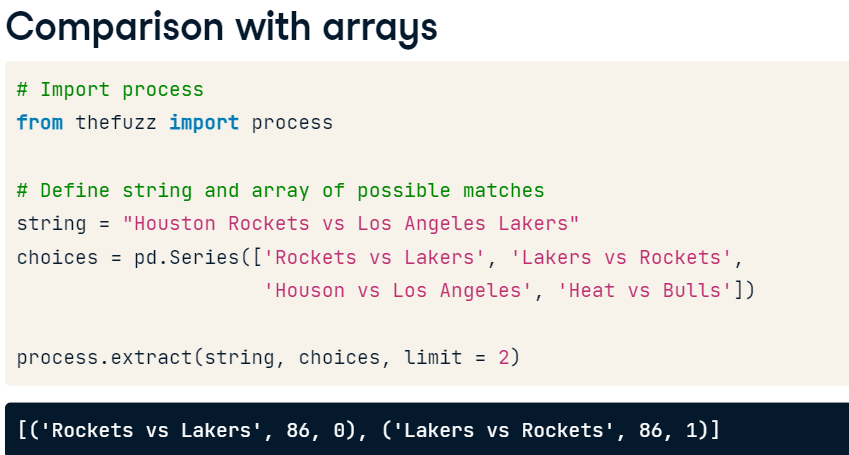

In [ ]:
# String comparission using the levenshtein algorithm and 'thefuzz' package
from thefuzz import fuzz

# Compare reeding vs reading
fezz.WRatio('Reeding', 'Reading')

In [ ]:
# COMPARISSION WITH ARRAYS

# Comparing a string with an array of strings
from thefuzz import process
# Define String and array of possible matches
string = "Houston Rockets vs Los Angeles Lakers"
choices = pd.Series(['Rockets vs Lakers', 'Lakers vs Rockets', 'Houson vs Los Angeles', 'Heat vs Bulls'])
process.extract(string, choices, limit = 2)

#### Collapsing Categories with string similarity
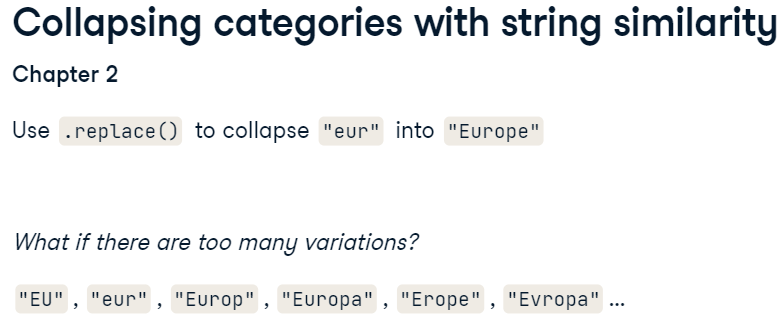

-EXAMPLE:
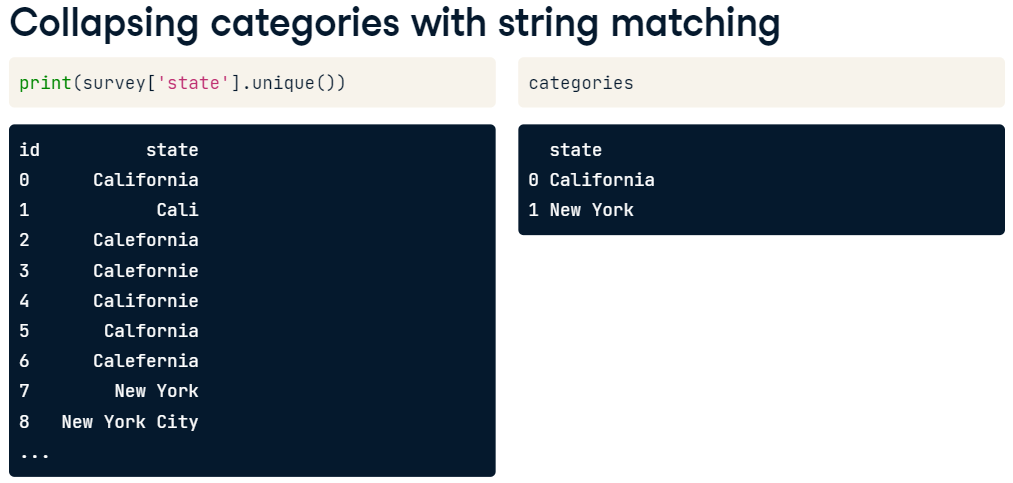


In [ ]:
# Collapsing Categories with string similarity

# For each correct category
for state in categories['state']:
    # Find potential matches in states with typos
    matches = process.extract(state, survey['state'], limit = survey.shape[0])
    # For each potential match
    for potential_match in matches:
        # If hugh similarity score
        if potential_match[1] >= 80:
            # Replace Typo with correct category
            survey.loc[survey['state'] == potential_match[0], 'state'] = state

### Generating Pairs

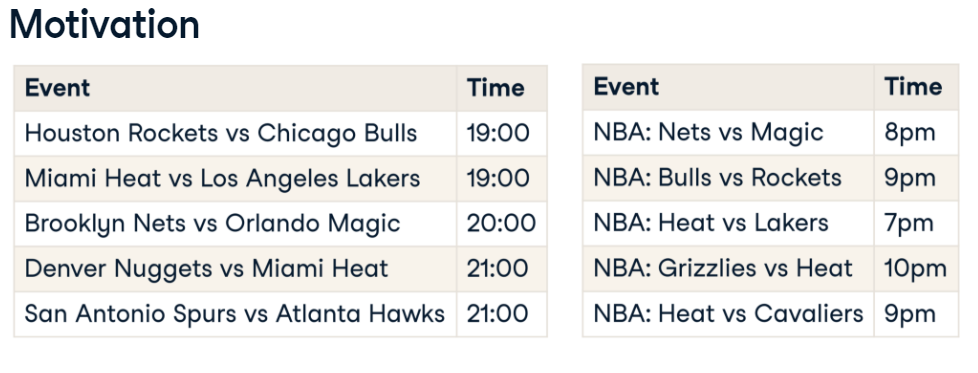

#### Record Linkage
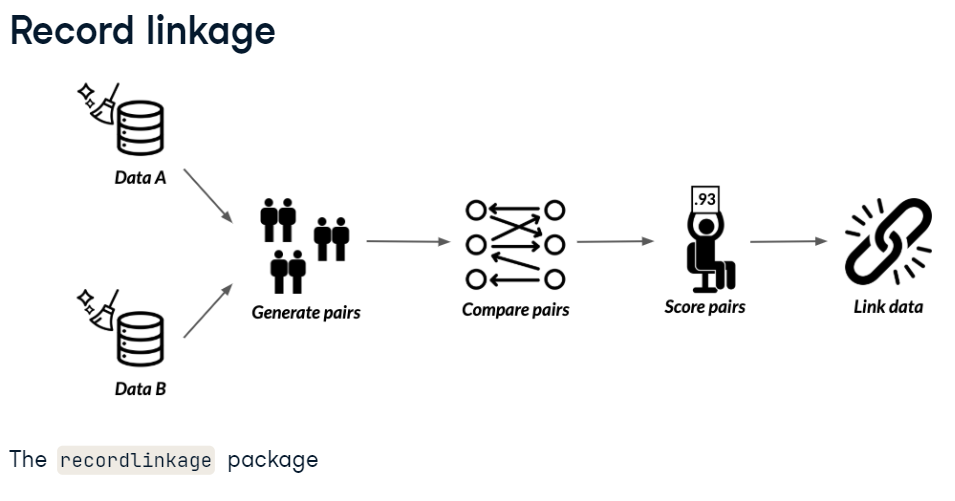


In [ ]:
# Generating Pairs

# import recordlinkage
import recordlinkage
# Create indexing object
indexer = recordlinkage.Index()
# Generate pairs blocked on state
indexer.block('state')
pairs = indexer.index(census_A, census_B)

# Comparing the DataFrames

# Generate the pairs
pairs = indexer.Index(census_A, census_B)
# Create a Compare object
compare_cl = recordlinkage.Compare()
# Find exact matches for pairs of date_of_birth and state
compare_cl.exact('date_of_birth', 'date_of_birth', label = 'date_of_birth')
compare_cl.exact('state', 'state', label = 'state')
# Find similar matches for pairs of surname and address_1 using string similarity
compare_cl.string('surname', 'surname', threshold = 0.85, label = 'surname')
compare_cl.string('address_1', 'address_1', threshold = 0.85, label = 'adddress_1')

# Find Matches
potential_matches = compare_cl.compute(pairs, census_A, census_B)
# Finding only matches we want
potential_matches[potential_matches.sum(axis = 1) => 2]

### Linking Data

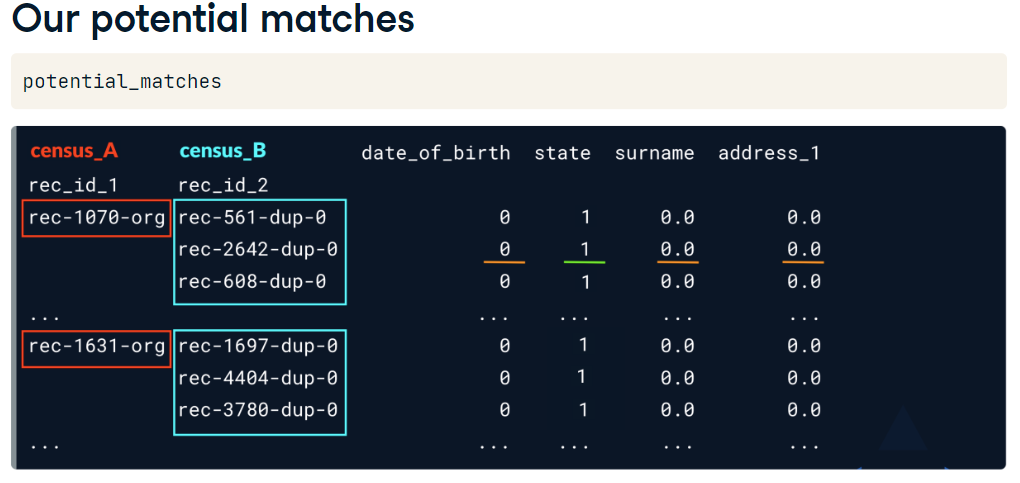


In [ ]:
# Probable matches
matches = potential_matches[potential_matches.sum(axis = 1) >= 3]

# Get indices from census_B only
duplicate_rows = matches.index.get_level_values(1)
print(census_B_index)

# Finding duplicates in census_B
census_B_duplicates = census_B[census_B.index.isin(duplicate_rows)]

# Finding new rows in census_B
census_B_new = census_B[~census_B.index.isin(duplicate_rows)]

# Linking the dataframes
full_census = census_A.append(census_B_new)
